<a href="https://colab.research.google.com/github/vnvz/Boston-house-prices-analysis/blob/main/boston_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [502]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, KFold

In [503]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Parte 1: Regressões lineares, polinomiais e avaliador R² Score

## Organização das colunas e dados

Como os dados estão desorganizados em uma coluna com varios valores separados por um espaço, iremos importar os dados e organizá-los em colunas.

In [504]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dados/housing_train.csv', header=0, sep=',')
df_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dados/housing_test.csv', header=0, sep=',')

In [505]:
df.head(500)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [506]:
df_test.head(500)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,496,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60
169,497,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14
170,499,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92
171,501,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33


## Dicionário de dados
| Nome     | Tipo de Dado | Descrição                                                  |
|----------|--------------|------------------------------------------------------------|
| ZN       | Numérico     | Proporção de terrenos residenciais zonados para lotes com mais de 25.000 pés quadrados.                        |
| INDUS    | Numérico     | Proporção de acres de negócios não varejistas por cidade.   |
| CHAS     | Categórico   | Variável dummy do rio Charles (1 se o lote limita o rio, 0 caso contrário). |
| NOX      | Numérico     | Concentração de óxidos nítricos (partes por 10 milhões).   |
| RM       | Numérico     | Número médio de cômodos por habitação.                    |
| AGE      | Numérico     | Proporção de unidades ocupadas por seus proprietários construídas antes de 1940. |
| DIS      | Numérico     | Distâncias ponderadas para cinco centros de emprego em Boston. |
| RAD      | Numérico     | Índice de acessibilidade a rodovias radiais.              |
| TAX      | Numérico     | Taxa de imposto sobre a propriedade de valor total por $10.000. |
| PTRATIO  | Numérico     | Proporção de alunos por professor na cidade.             |
| LSTAT    | Numérico     | Percentual de status inferior da população.              |
| MEDV     | Numérico     | Valor médio das casas ocupadas por seus proprietários em milhares de dólares. |


## Tratamento, exploração e análise

## Tratamento de dados
Estaremos removendo a coluna `black`, já que ela possui implicações de caratér ético e ela é fora do escopo da análise.

In [507]:
df.drop('black', axis=1, inplace=True)
df_test.drop('black', axis=1, inplace=True)

### Correlação dos dados
Inicialmente, faremos uma matriz de correlação para encontrar as variáveis mais relacionadas a nossa variável-alvo (`MEDV`).

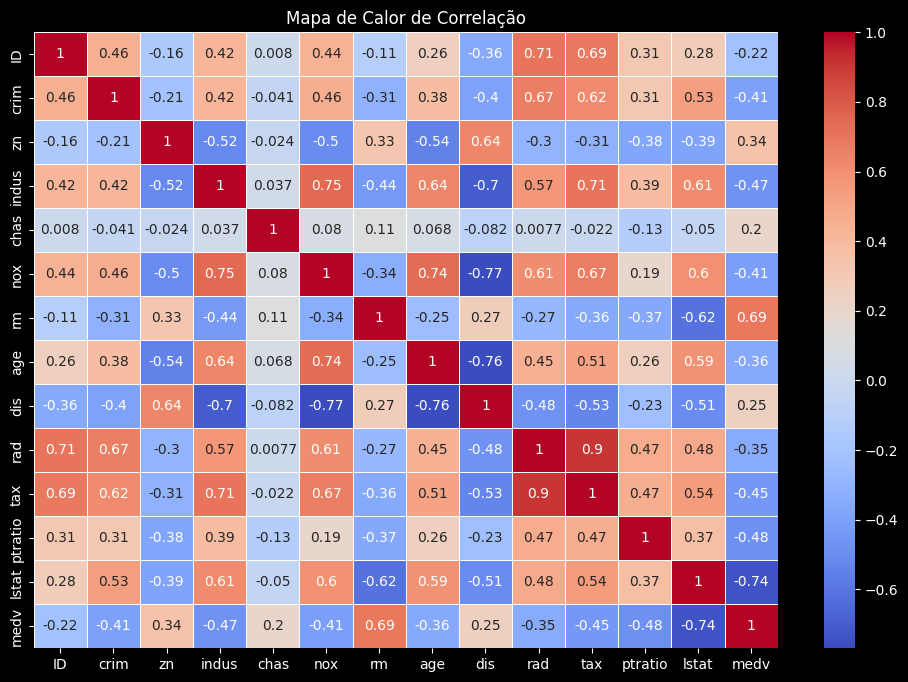

In [508]:
corr_matrix = df.corr()

plt.style.use('dark_background')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Mapa de Calor de Correlação")
plt.show()

A partir de uma análise simples, temos duas variáveis que possuem uma correlação altíssima, tanto positiva quanto negativa. Essas variáveis sendo `RM` e `LSTAT` em relação a `MEDV`.

Para confirmar a sua relação com `MEDV`, iremos realizar o teste de correlação de pearson e plotar a dispersão das duas colunas.

### Gráfico de dispersão

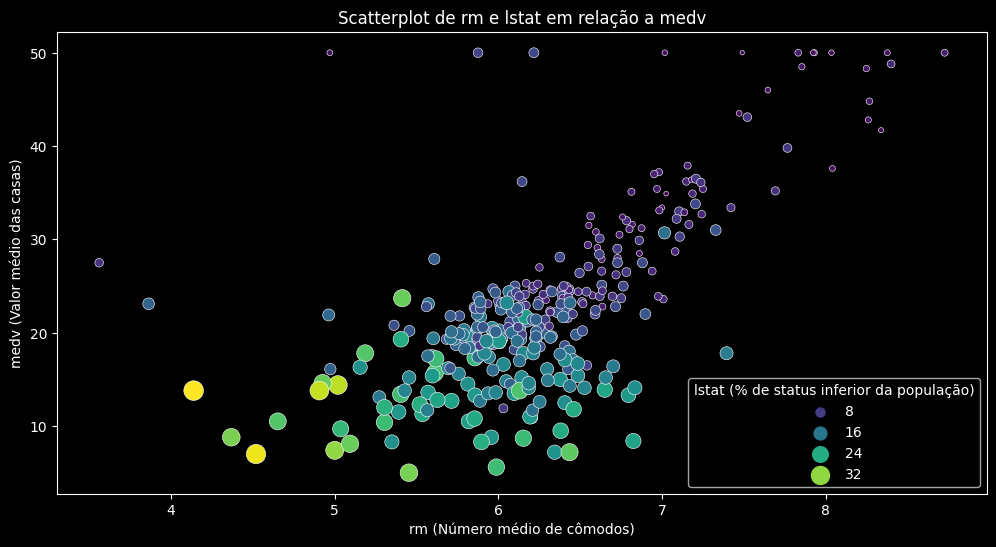

In [569]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='rm', y='medv', hue='lstat', palette='viridis', size='lstat', sizes=(10, 200))
plt.title('Scatterplot de rm e lstat em relação a medv')
plt.xlabel('rm (Número médio de cômodos)')
plt.ylabel('medv (Valor médio das casas)')
plt.legend(title='lstat (% de status inferior da população)')
plt.show()

### Escolha da melhor variável de entrada para o modelo
Para seguir com o treinamento, escolhemos a variável `RM` devido ao nosso entendimento que essa variável é bastante significativa para definir o valor das casas, já que quanto mais quartos presentes em cada casa, maior será o valor dela.

## Divisões da base
Aqui, realizamos a divisão da base em treinamento e teste utilizando o método holdout.

Aqui irão ocorrer todas as divisões de base pertinentes a esse Colab.

In [510]:
X = df['rm']
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=42)

X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

X1 = df[['rm', 'lstat', 'ptratio', 'indus', 'tax']]
y1 = df['medv']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.31, random_state=42)

## Padronizações dos modelos
Para isso, utilizaremos o Robust Scaler, já que ele é resistente a outliers.

In [511]:
scaler = RobustScaler()

X_train = scaler.fit(X_train).transform(X_train)
X_test = scaler.fit(X_test).transform(X_test)

X1_train = scaler.fit(X1_train).transform(X1_train)
X1_test = scaler.fit(X1_test).transform(X1_test)

## Regressão linear

### Treinamento do modelo
Abaixo, realizamos o treinamento do modelo com as bases de treinamento.

In [512]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Visualização do modelo

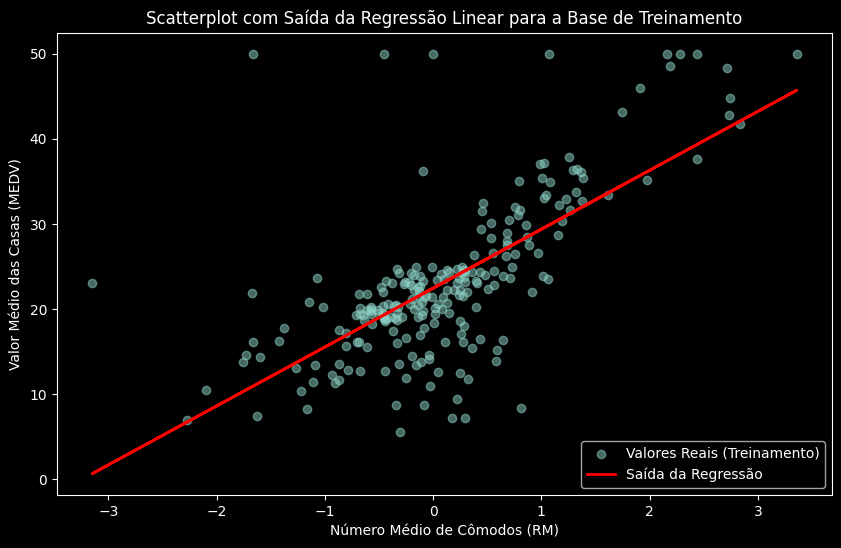

In [513]:
y_pred_train = model.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.5, label='Valores Reais (Treinamento)')
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Saída da Regressão')
plt.title('Scatterplot com Saída da Regressão Linear para a Base de Treinamento')
plt.xlabel('Número Médio de Cômodos (RM)')
plt.ylabel('Valor Médio das Casas (MEDV)')
plt.legend()
plt.show()

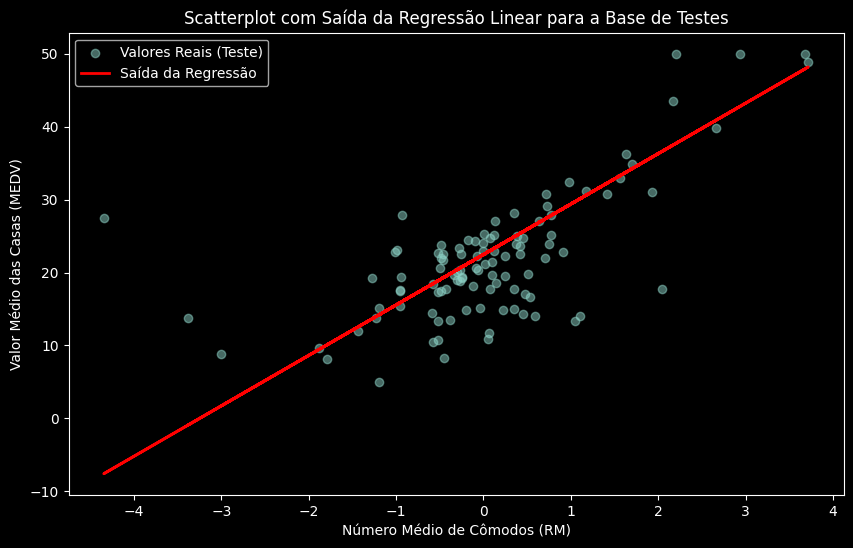

In [514]:
y_pred_test = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Valores Reais (Teste)')
plt.plot(X_test, y_pred_test, color='red', linewidth=2, label='Saída da Regressão')
plt.title('Scatterplot com Saída da Regressão Linear para a Base de Testes')
plt.xlabel('Número Médio de Cômodos (RM)')
plt.ylabel('Valor Médio das Casas (MEDV)')
plt.legend()
plt.show()

### R² Score

In [515]:
r2_train = r2_score(y_train, model.predict(X_train))
r2_train = round(r2_train, 2)
print(f"R² no Conjunto de Treinamento: {r2_train}")

r2_test = r2_score(y_test, model.predict(X_test))
r2_test = round(r2_test, 2)
print(f"R² no Conjunto de Teste: {r2_test}")

R² no Conjunto de Treinamento: 0.48
R² no Conjunto de Teste: 0.39


Com os valores do R² encontrados, podemos inferir dois pontos:
- O score no conjunto de treinamento indica que ele possui um juste ok do modelo, mas ainda há o que melhorar.
- O score no conjunto de testes indica que ele está próximo dos treinos, porém ainda há o que melhorar.

### Treinamento com mais variáveis
Agora, vamos voltar um pouco atrás e encontrar as outras variáveis com alta correlação (negativa ou positiva) com a variável alvo, `MEDV`.

In [516]:
positive_correlations = corr_matrix['medv'].sort_values(ascending=False)
positive_correlations = positive_correlations[positive_correlations > 0]

negative_correlations = corr_matrix['medv'].sort_values(ascending=True)
negative_correlations = negative_correlations[negative_correlations < 0]

print("Variáveis com as maiores correlações positivas:")
print(positive_correlations)
print("\nVariáveis com as maiores correlações negativas:")
print(negative_correlations)

Variáveis com as maiores correlações positivas:
medv    1.000000
rm      0.689598
zn      0.344842
dis     0.249422
chas    0.204390
Name: medv, dtype: float64

Variáveis com as maiores correlações negativas:
lstat     -0.738600
ptratio   -0.481376
indus     -0.473932
tax       -0.448078
nox       -0.413054
crim      -0.407454
age       -0.358888
rad       -0.352251
ID        -0.221694
Name: medv, dtype: float64


Essas variáveis são, excluindo a já utilizada `RM`:
- `LSTAT`
- `PTRATIO`
- `INDUS`
- `TAX`

Utilizaremos essas 5 colunas para os próximos treinamentos

#### Treinamento do novo modelo

In [517]:
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

#### Visualizações do novo modelo

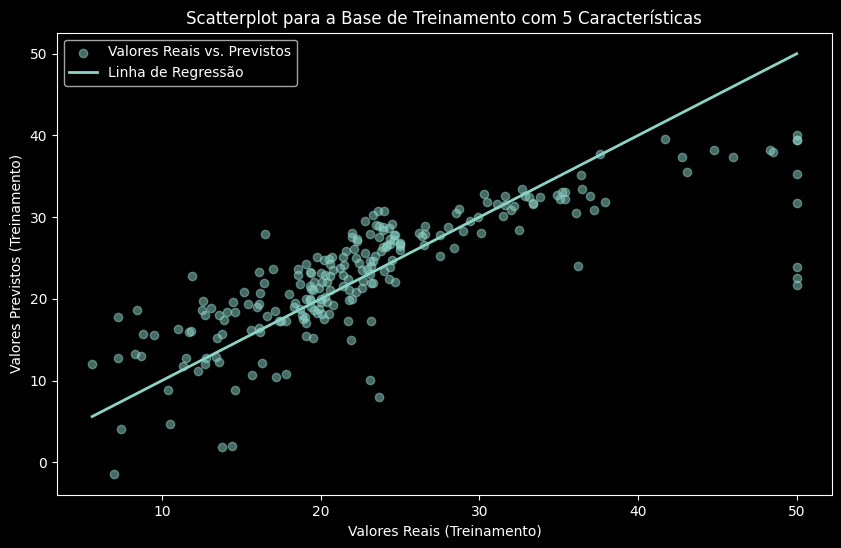

In [518]:
y1_pred_train = model1.predict(X1_train)

plt.figure(figsize=(10, 6))
plt.scatter(y1_train, y1_pred_train, alpha=0.5, label='Valores Reais vs. Previstos')
plt.plot([y1_train.min(), y1_train.max()], [y1_train.min(), y1_train.max()], '-', lw=2, label='Linha de Regressão')
plt.title('Scatterplot para a Base de Treinamento com 5 Características')
plt.xlabel('Valores Reais (Treinamento)')
plt.ylabel('Valores Previstos (Treinamento)')
plt.legend()
plt.show()

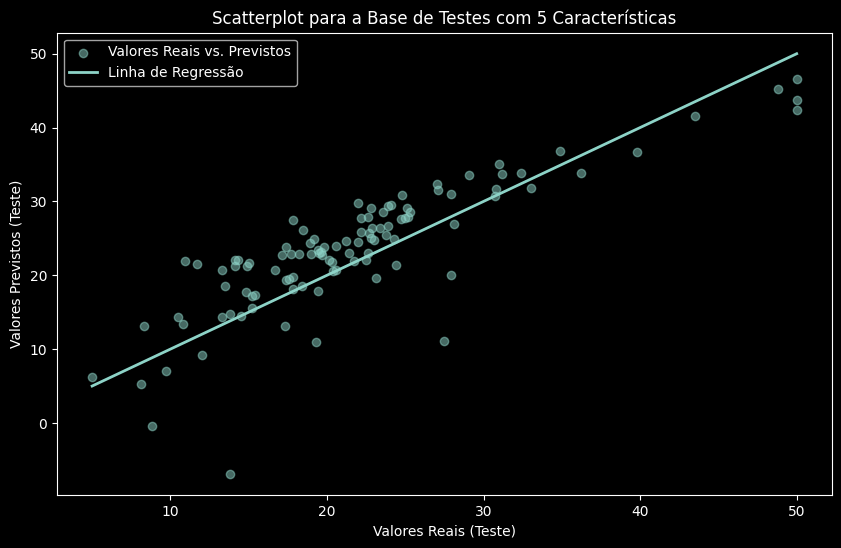

In [519]:
y1_pred_test = model1.predict(X1_test)

plt.figure(figsize=(10, 6))
plt.scatter(y1_test, y1_pred_test, alpha=0.5, label='Valores Reais vs. Previstos')
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], '-', lw=2, label='Linha de Regressão')
plt.title('Scatterplot para a Base de Testes com 5 Características')
plt.xlabel('Valores Reais (Teste)')
plt.ylabel('Valores Previstos (Teste)')
plt.legend()
plt.show()

#### R² Score do novo modelo


In [520]:
r2_train = r2_score(y1_train, y1_pred_train)
r2_train = round(r2_train, 2)
print(f"R² no Conjunto de Treinamento: {r2_train}")

r2_test = r2_score(y1_test, y1_pred_test)
r2_test = round(r2_test, 2)
print(f"R² no Conjunto de Teste: {r2_test}")

R² no Conjunto de Treinamento: 0.64
R² no Conjunto de Teste: 0.65


### Avaliação do novo modelo e comparação com o anterior.
Podemos observar através do R² score que com mais features disponíves para o treinamento do regressor, melhor foi seu desempenho em comparação com apenas um deles.

## Regressão polinomial

### Treinamento do modelo
Abaixo, utilizando a divisão anterior da base, realizaremos o treinamento com graus de polinômios diferentes (`2`, `3` e `5`)

In [521]:
# Modelo de Regressão Polinomial de Grau 2
poly2 = PolynomialFeatures(degree=2)
X1_train_poly2 = poly2.fit_transform(X1_train)
X1_test_poly2 = poly2.transform(X1_test)

poly2_model = LinearRegression()
poly2_model.fit(X1_train_poly2, y1_train)
poly2_predictions = poly2_model.predict(X1_test_poly2)

# Modelo de Regressão Polinomial de Grau 3
poly3 = PolynomialFeatures(degree=3)
X1_train_poly3 = poly3.fit_transform(X1_train)
X1_test_poly3 = poly3.transform(X1_test)

poly3_model = LinearRegression()
poly3_model.fit(X1_train_poly3, y1_train)
poly3_predictions = poly3_model.predict(X1_test_poly3)

# Modelo de Regressão Polinomial de Grau 5
poly5 = PolynomialFeatures(degree=5)
X1_train_poly5 = poly5.fit_transform(X1_train)
X1_test_poly5 = poly5.transform(X1_test)

poly5_model = LinearRegression()
poly5_model.fit(X1_train_poly5, y1_train)
poly5_predictions = poly5_model.predict(X1_test_poly5)

### R² Score dos modelos polinomiais

In [522]:
r2_score_poly2 = r2_score(y1_test, poly2_predictions)
r2_score_poly3 = r2_score(y1_test, poly3_predictions)
r2_score_poly5 = r2_score(y1_test, poly5_predictions)

print(f"R² score para modelo polinomial de grau 2: {r2_score_poly2:.2f}")
print(f"R² score para modelo polinomial de grau 3: {r2_score_poly3:.2f}")
print(f"R² score para modelo polinomial de grau 5: {r2_score_poly5:.2f}")

R² score para modelo polinomial de grau 2: 0.67
R² score para modelo polinomial de grau 3: -9.69
R² score para modelo polinomial de grau 5: -215035.65


Aqui, podemos ver que o único modelo viável é o Polinomial de Grau 2. Ele consegue explicar bem as nuances do modelo em relação ao dataset, porém os outros dois não são viáveis.

## [EXTRA] Comparação com outros modelos com regularizações Ridge e Lasso
Aqui, vamos selecionar o modelo de Regressão Linear com 5 features e compará-lo ao mesmo modelo utilizando as regularizações.

Inicialmente, utilizaremos o valor de alpha igual a `1`, porém depois testaremos outros utilizando a validação K-Fold

In [523]:
alpha_ridge = 1.0

model_ridge = Ridge(alpha=alpha_ridge)
model_ridge.fit(X1_train, y1_train)

alpha_lasso = 1.0

model_lasso = Lasso(alpha=alpha_lasso)
model_lasso.fit(X1_train, y1_train)

Lasso()

### Visualização dos modelos - Linear x Ridge x Lasso

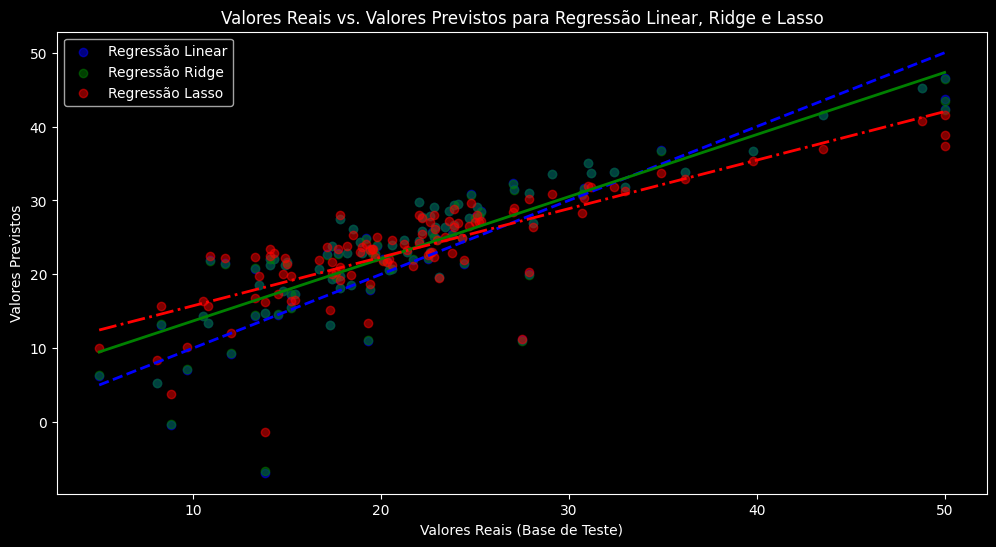

In [524]:
y_real = y1_test

y_pred_linear = model1.predict(X1_test)
y_pred_ridge = model_ridge.predict(X1_test)
y_pred_lasso = model_lasso.predict(X1_test)

x_range = np.linspace(min(y_real), max(y_real), len(y_real))

plt.figure(figsize=(12, 6))

# Gráfico de Valores Reais vs. Valores Previstos (Regressão Linear)
plt.scatter(y_real, y_pred_linear, alpha=0.5, label='Regressão Linear', color='blue')
plt.plot(x_range, x_range, color='blue', linestyle='--', lw=2)

# Gráfico de Valores Reais vs. Valores Previstos (Regressão Ridge)
plt.scatter(y_real, y_pred_ridge, alpha=0.5, label='Regressão Ridge', color='green')
plt.plot(np.unique(y_real), np.poly1d(np.polyfit(y_real, y_pred_ridge, 1))(np.unique(y_real)), color='green', linestyle='-', lw=2)

# Gráfico de Valores Reais vs. Valores Previstos (Regressão Lasso)
plt.scatter(y_real, y_pred_lasso, alpha=0.5, label='Regressão Lasso', color='red')
plt.plot(np.unique(y_real), np.poly1d(np.polyfit(y_real, y_pred_lasso, 1))(np.unique(y_real)), color='red', linestyle='-.', lw=2)

plt.xlabel('Valores Reais (Base de Teste)')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos para Regressão Linear, Ridge e Lasso')
plt.legend()
plt.show()

### R² Score - Linear x Ridge x Lasso

In [525]:
r2_score_linear = r2_score(y1_test, y_pred_linear)
r2_score_ridge = r2_score(y1_test, y_pred_ridge)
r2_score_lasso = r2_score(y1_test, y_pred_lasso)

print(f"R² Score para Regressão Linear: {r2_score_linear:.2f}")
print(f"R² Score para Regressão Ridge: {r2_score_ridge:.2f}")
print(f"R² Score para Regressão Lasso: {r2_score_lasso:.2f}")

R² Score para Regressão Linear: 0.65
R² Score para Regressão Ridge: 0.66
R² Score para Regressão Lasso: 0.64


Baseado no R² score, o modelo Ridge superou um pouco o Linear, porém os três estão muito próximos.

# Considerações finais da parte 1
Avaliando os três modelos com as regularizações, podemos dizer que as três empataram no quesito de R² score. Porém, analisando visualmente os gráficos, podemos assumir que as regressões Ridge e Lasso obtiveram resultados muito semelhantes.

E das regressões polinomiais, o único modelo viável é a grau 2.

Ainda não é possível dizer qual é o melhor modelo, por isso, vamos avaliá-los utilizando outras métricas.

# Parte 2: Avaliadores gerais e R² Score
Recapitulando, temos os seguintes modelos treinados até o momento:
- Linear com 1 feature (`model`)
- Linear com 5 features (`model1`)
- Polinomial Grau 2 (`poly2_model`)
- Polinomial Grau 3 (`poly3_model`)
- Polinomial Grau 5 (`poly5_model`)
- Lasso (`model_lasso`)
- Ridge (`model_ridge`)

A partir da análise desses modelos e comparações entre si com os avaliadores abaixo, iremos definir o melhor modelo para a submissão.
- Resíduos vs. Preditos
- Histograma da distribuição dos resíduos
- Mean Absolue Error
- Mean Square Error
- Root Mean Square Error
- Erro Médio Absoluto Percentual
- R² (R-Squared)

A análise completa de todos os modelos será feita ao fim dessa sessão.

## Linear com 1 feature


In [526]:
y_pred = model.predict(X_test)

### Resíduos vs. Preditos

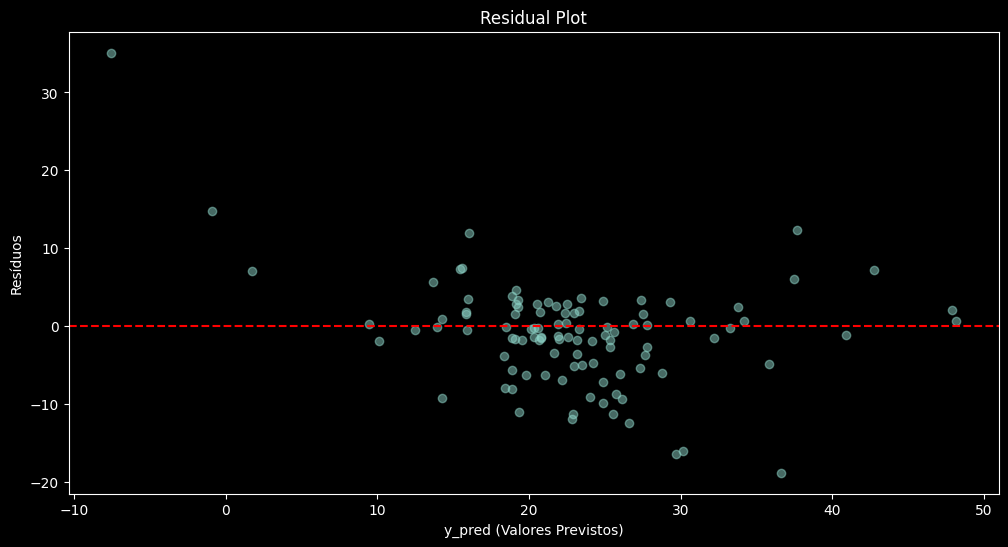

In [527]:
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('y_pred (Valores Previstos)')
plt.ylabel('Resíduos')
plt.show()

### Histograma da distribuição dos resíduos

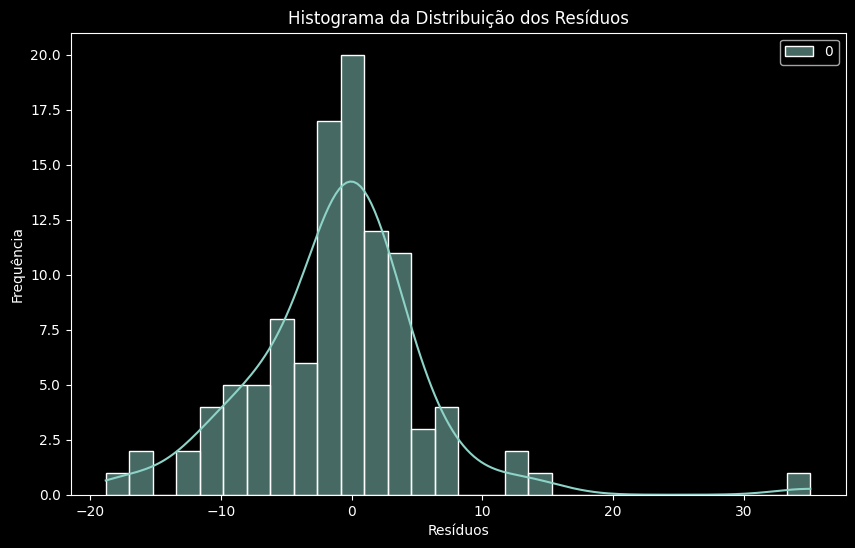

In [528]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='b')
plt.title('Histograma da Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

### Mean Absolute Error

In [529]:
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (Erro Absoluto Médio): {mae:.2f}")

MAE (Erro Absoluto Médio): 4.55


### Mean Square Error

In [530]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE (Erro Quadrático Médio): {mse:.2f}")

MSE (Erro Quadrático Médio): 46.55


### Root Mean Square Error

In [531]:
rmse = np.sqrt(mse)
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")

RMSE (Raiz do Erro Quadrático Médio): 6.82


### Erro Médio Absoluto Percentual

In [532]:
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(f"MAPE (Erro Percentual Absoluto Médio): {mape:.2f}%")

MAPE (Erro Percentual Absoluto Médio): 27.47%


### R² (R-Squared)

In [533]:
r2 = r2_score(y_test, y_pred)
print(f"R² (Coeficiente de Determinação): {r2:.2f}")

R² (Coeficiente de Determinação): 0.39


## Linear com 5 features



In [534]:
y_pred1 = model1.predict(X1_test)

### Resíduos vs. Preditos

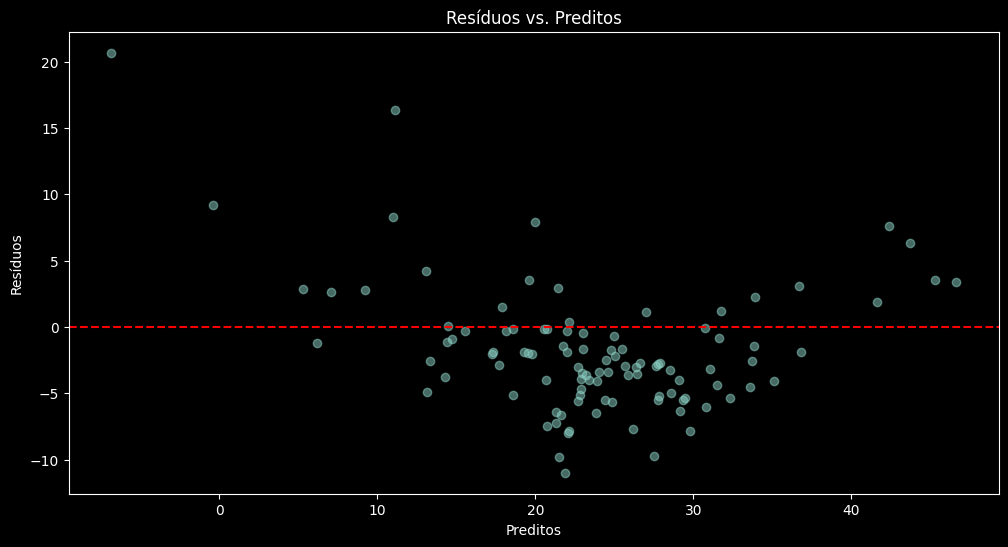

In [535]:
residuals1 = y1_test - y_pred1

plt.figure(figsize=(12, 6))
plt.scatter(y_pred1, residuals1, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs. Preditos')
plt.xlabel('Preditos')
plt.ylabel('Resíduos')
plt.show()

### Histograma da distribuição dos resíduos

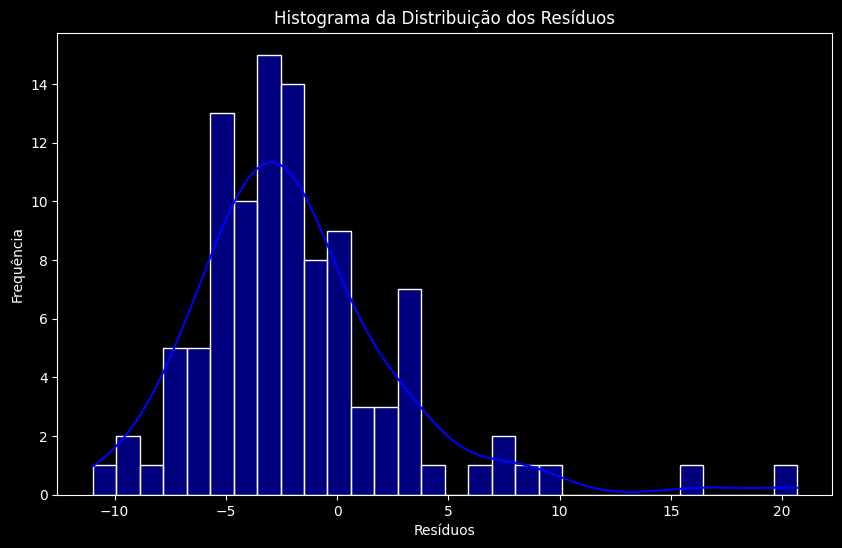

In [536]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals1, bins=30, kde=True, color='b')
plt.title('Histograma da Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

### Mean Absolute Error

In [537]:
mae1 = mean_absolute_error(y1_test, y_pred1)
print(f"MAE (Erro Absoluto Médio - Modelo 1): {mae1:.2f}")

MAE (Erro Absoluto Médio - Modelo 1): 3.99


### Mean Square Error

In [538]:
mse1 = mean_squared_error(y1_test, y_pred1)
print(f"MSE (Erro Quadrático Médio - Modelo 1): {mse1:.2f}")

MSE (Erro Quadrático Médio - Modelo 1): 26.19


### Root Mean Square Error

In [539]:
rmse1 = np.sqrt(mse1)
print(f"RMSE (Raiz do Erro Quadrático Médio - Modelo 1): {rmse1:.2f}")

RMSE (Raiz do Erro Quadrático Médio - Modelo 1): 5.12


### Erro Médio Absoluto Percentual

In [540]:
mape1 = mean_absolute_percentage_error(y1_test, y_pred1) * 100
print(f"MAPE (Erro Médio Absoluto Percentual - Modelo 1): {mape1:.2f}%")

MAPE (Erro Médio Absoluto Percentual - Modelo 1): 22.24%


### R² (R-Squared)

In [541]:
r2_1 = r2_score(y1_test, y_pred1)
print(f"R² (Coeficiente de Determinação - Modelo 1): {r2_1:.2f}")

R² (Coeficiente de Determinação - Modelo 1): 0.65


## Polinomial Grau 2
Todas as métricas estão calculadas e demonstradas nos códigos abaixo.

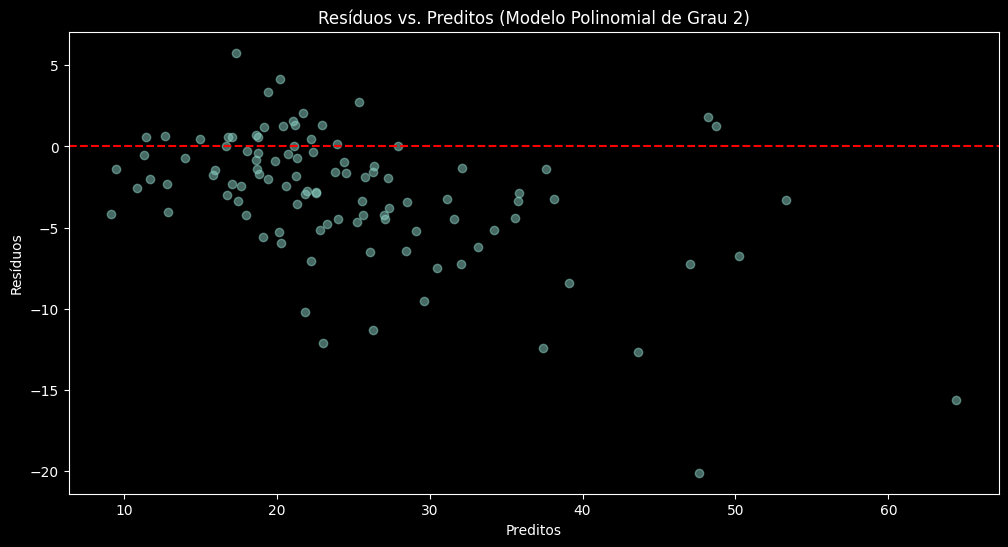

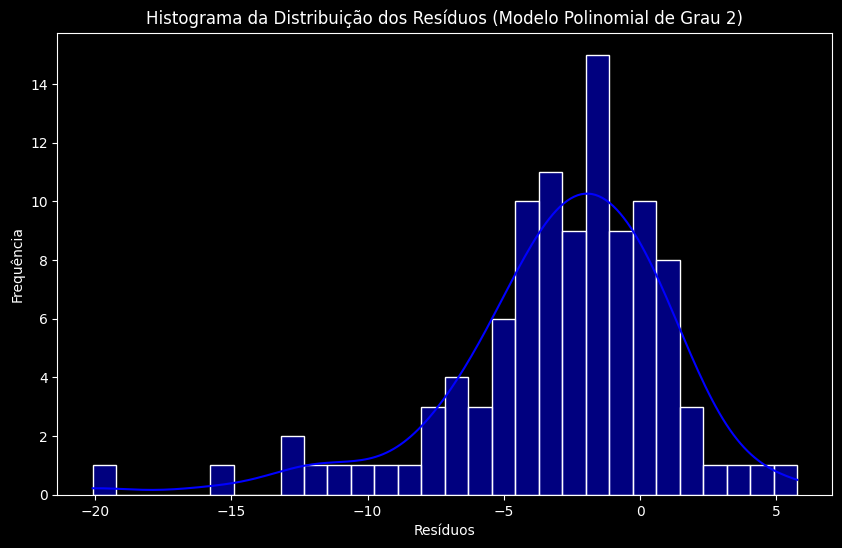

In [542]:
residuals_poly2 = y1_test.values - poly2_predictions

# Gráfico Resíduos vs. Preditos (Modelo Polinomial de Grau 2)
plt.figure(figsize=(12, 6))
plt.scatter(poly2_predictions, residuals_poly2, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs. Preditos (Modelo Polinomial de Grau 2)')
plt.xlabel('Preditos')
plt.ylabel('Resíduos')
plt.show()

# Histograma da distribuição dos resíduos (Modelo Polinomial de Grau 2)
plt.figure(figsize=(10, 6))
sns.histplot(residuals_poly2, bins=30, kde=True, color='b')
plt.title('Histograma da Distribuição dos Resíduos (Modelo Polinomial de Grau 2)')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

In [543]:
# Calcular o MAE (Erro Absoluto Médio) para o Modelo Polinomial de Grau 2
mae_poly2 = mean_absolute_error(y1_test, poly2_predictions)
print(f"MAE (Erro Absoluto Médio - Modelo Polinomial de Grau 2): {mae_poly2:.2f}")

# Calcular o MSE (Erro Quadrático Médio) para o Modelo Polinomial de Grau 2
mse_poly2 = mean_squared_error(y1_test, poly2_predictions)
print(f"MSE (Erro Quadrático Médio - Modelo Polinomial de Grau 2): {mse_poly2:.2f}")

# Calcular o RMSE (Raiz do Erro Quadrático Médio) para o Modelo Polinomial de Grau 2
rmse_poly2 = np.sqrt(mse_poly2)
print(f"RMSE (Raiz do Erro Quadrático Médio - Modelo Polinomial de Grau 2): {rmse_poly2:.2f}")

#Calcule o R² score para o modelo polinomial de grau 2
r2_score_poly2 = r2_score(y1_test, poly2_predictions)
print(f"R² (Coeficiente de Determinação - Modelo Polinomial de Grau 2): {r2_score_poly2:.2f}")

MAE (Erro Absoluto Médio - Modelo Polinomial de Grau 2): 3.58
MSE (Erro Quadrático Médio - Modelo Polinomial de Grau 2): 24.85
RMSE (Raiz do Erro Quadrático Médio - Modelo Polinomial de Grau 2): 4.99
R² (Coeficiente de Determinação - Modelo Polinomial de Grau 2): 0.67


## Polinomial Grau 3

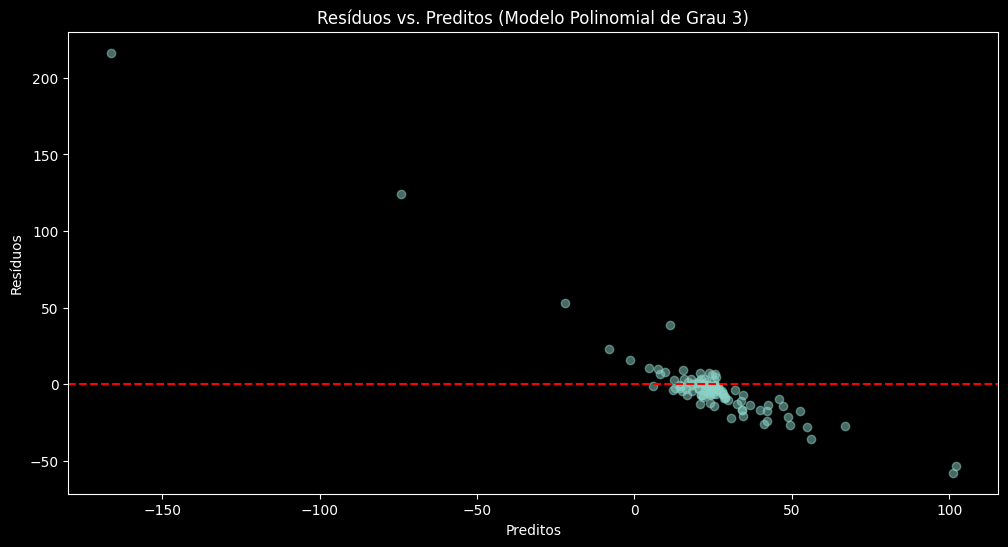

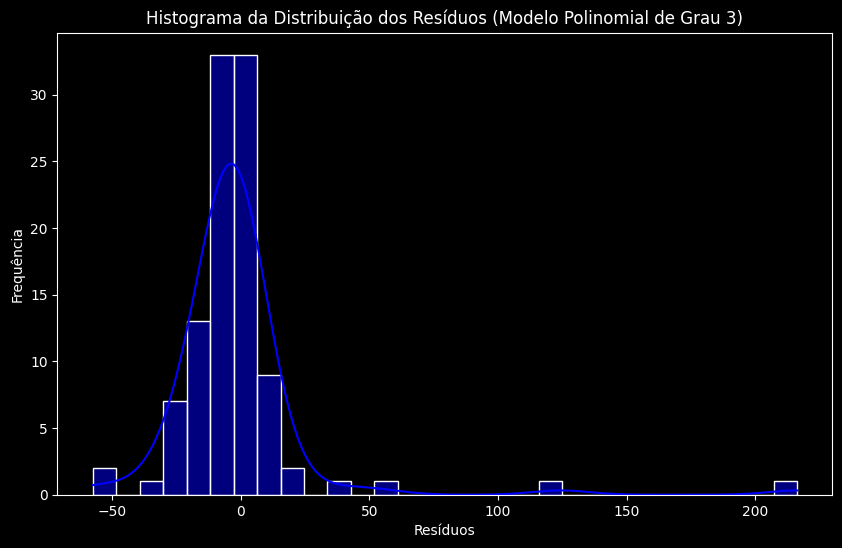

In [544]:
residuals_poly3 = y1_test.values - poly3_predictions

# Gráfico Resíduos vs. Preditos (Modelo Polinomial de Grau 3)
plt.figure(figsize=(12, 6))
plt.scatter(poly3_predictions, residuals_poly3, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs. Preditos (Modelo Polinomial de Grau 3)')
plt.xlabel('Preditos')
plt.ylabel('Resíduos')
plt.show()

# Histograma da distribuição dos resíduos (Modelo Polinomial de Grau 3)
plt.figure(figsize=(10, 6))
sns.histplot(residuals_poly3, bins=30, kde=True, color='b')
plt.title('Histograma da Distribuição dos Resíduos (Modelo Polinomial de Grau 3)')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

In [545]:
# Calcular o MAE (Erro Absoluto Médio) para o Modelo Polinomial de Grau 3
mae_poly3 = mean_absolute_error(y1_test, poly3_predictions)
print(f"MAE (Erro Absoluto Médio - Modelo Polinomial de Grau 3): {mae_poly3:.2f}")

# Calcular o MSE (Erro Quadrático Médio) para o Modelo Polinomial de Grau 3
mse_poly3 = mean_squared_error(y1_test, poly3_predictions)
print(f"MSE (Erro Quadrático Médio - Modelo Polinomial de Grau 3): {mse_poly3:.2f}")

# Calcular o RMSE (Raiz do Erro Quadrático Médio) para o Modelo Polinomial de Grau 3
rmse_poly3 = np.sqrt(mse_poly3)
print(f"RMSE (Raiz do Erro Quadrático Médio - Modelo Polinomial de Grau 3): {rmse_poly3:.2f}")

#Calcule o R² score para o modelo polinomial de grau 3
r2_score_poly3 = r2_score(y1_test, poly3_predictions)
print(f"R² (Coeficiente de Determinação - Modelo Polinomial de Grau 3): {r2_score_poly3:.2f}")

MAE (Erro Absoluto Médio - Modelo Polinomial de Grau 3): 12.71
MSE (Erro Quadrático Médio - Modelo Polinomial de Grau 3): 811.15
RMSE (Raiz do Erro Quadrático Médio - Modelo Polinomial de Grau 3): 28.48
R² (Coeficiente de Determinação - Modelo Polinomial de Grau 3): -9.69


## Polinomial Grau 5

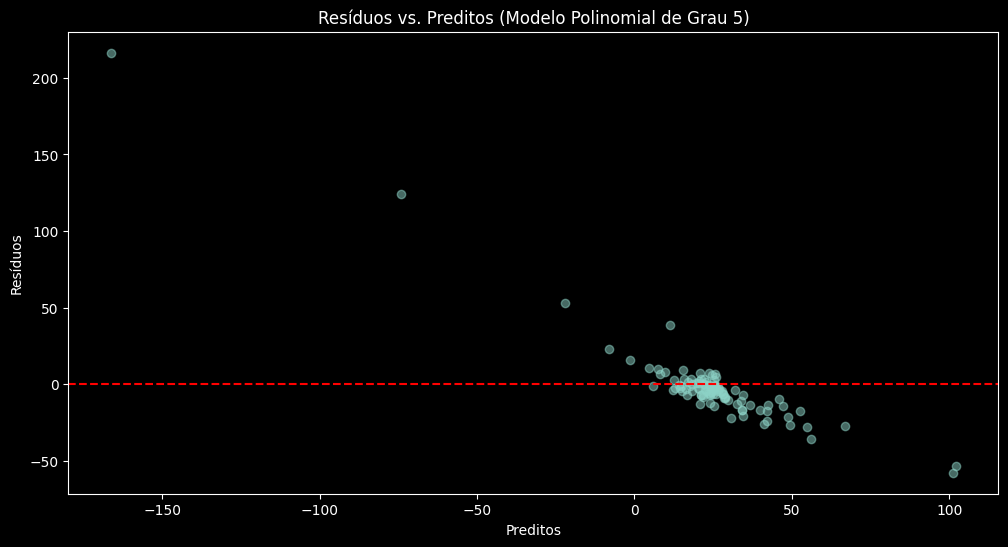

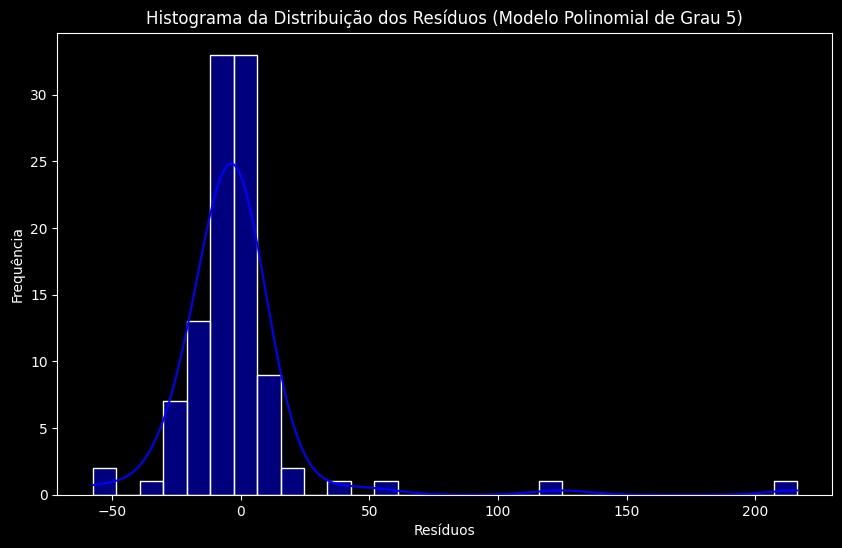

In [546]:
residuals_poly5 = y1_test.values - poly3_predictions

# Gráfico Resíduos vs. Preditos (Modelo Polinomial de Grau 5)
plt.figure(figsize=(12, 6))
plt.scatter(poly3_predictions, residuals_poly5, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs. Preditos (Modelo Polinomial de Grau 5)')
plt.xlabel('Preditos')
plt.ylabel('Resíduos')
plt.show()

# Histograma da distribuição dos resíduos (Modelo Polinomial de Grau 5)
plt.figure(figsize=(10, 6))
sns.histplot(residuals_poly5, bins=30, kde=True, color='b')
plt.title('Histograma da Distribuição dos Resíduos (Modelo Polinomial de Grau 5)')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

In [547]:
# Calcular o MAE (Erro Absoluto Médio) para o Modelo Polinomial de Grau 5
mae_poly5 = mean_absolute_error(y1_test, poly5_predictions)
print(f"MAE (Erro Absoluto Médio - Modelo Polinomial de Grau 5): {mae_poly5:.2f}")

# Calcular o MSE (Erro Quadrático Médio) para o Modelo Polinomial de Grau 5
mse_poly5 = mean_squared_error(y1_test, poly5_predictions)
print(f"MSE (Erro Quadrático Médio - Modelo Polinomial de Grau 5): {mse_poly5:.2f}")

# Calcular o RMSE (Raiz do Erro Quadrático Médio) para o Modelo Polinomial de Grau 5
rmse_poly5 = np.sqrt(mse_poly5)
print(f"RMSE (Raiz do Erro Quadrático Médio - Modelo Polinomial de Grau 5): {rmse_poly5:.2f}")

#Calcule o R² score para o modelo polinomial de Grau 5
r2_score_poly5 = r2_score(y1_test, poly5_predictions)
print(f"R² (Coeficiente de Determinação - Modelo Polinomial de Grau 5): {r2_score_poly5:.2f}")

MAE (Erro Absoluto Médio - Modelo Polinomial de Grau 5): 1280.89
MSE (Erro Quadrático Médio - Modelo Polinomial de Grau 5): 16316442.78
RMSE (Raiz do Erro Quadrático Médio - Modelo Polinomial de Grau 5): 4039.36
R² (Coeficiente de Determinação - Modelo Polinomial de Grau 5): -215035.65


## Ridge

In [548]:
y_pred_ridge = model_ridge.predict(X1_test)

### Resíduos vs. Preditos

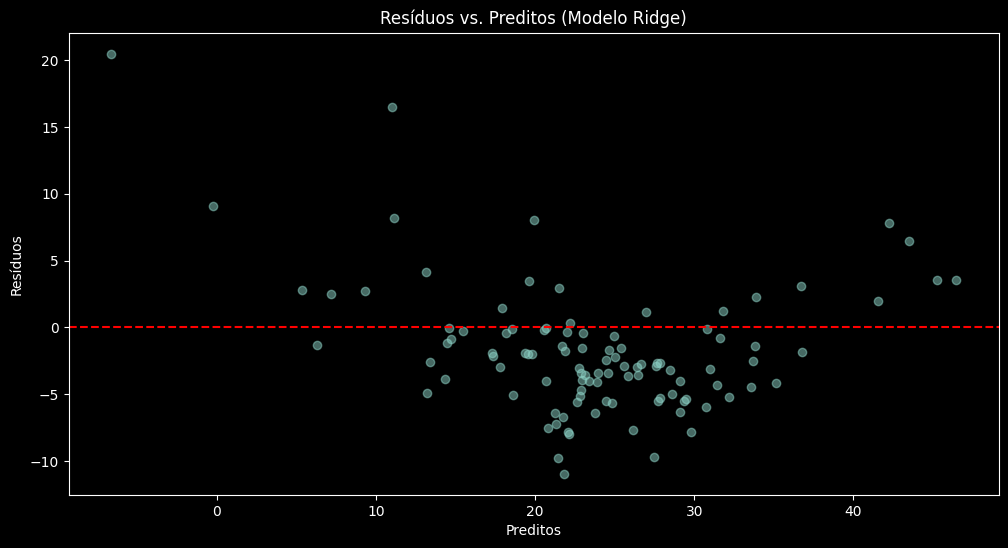

In [549]:
residuals_ridge = y1_test - y_pred_ridge

plt.figure(figsize=(12, 6))
plt.scatter(y_pred_ridge, residuals_ridge, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs. Preditos (Modelo Ridge)')
plt.xlabel('Preditos')
plt.ylabel('Resíduos')
plt.show()

### Histograma da distribuição dos resíduos

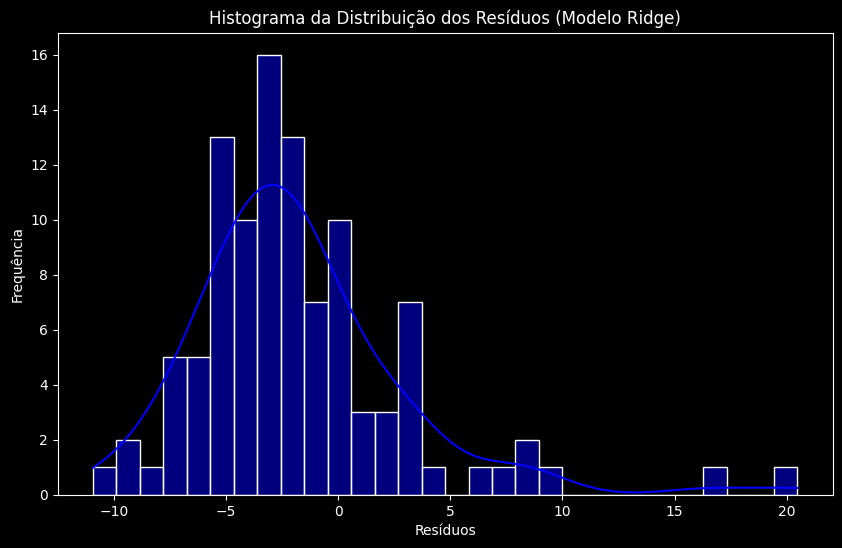

In [550]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals_ridge, bins=30, kde=True, color='b')
plt.title('Histograma da Distribuição dos Resíduos (Modelo Ridge)')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

### Mean Absolute Error

In [551]:
mae_ridge = mean_absolute_error(y1_test, y_pred_ridge)
print(f"MAE (Erro Absoluto Médio - Modelo Ridge): {mae_ridge:.2f}")

MAE (Erro Absoluto Médio - Modelo Ridge): 3.98


### Mean Square Error

In [552]:
mse_ridge = mean_squared_error(y1_test, y_pred_ridge)
print(f"MSE (Erro Quadrático Médio - Modelo Ridge): {mse_ridge:.2f}")

MSE (Erro Quadrático Médio - Modelo Ridge): 26.07


### Root Mean Square Error

In [553]:
rmse_ridge = np.sqrt(mse_ridge)
print(f"RMSE (Raiz do Erro Quadrático Médio - Modelo Ridge): {rmse_ridge:.2f}")

RMSE (Raiz do Erro Quadrático Médio - Modelo Ridge): 5.11


### Erro Médio Absoluto Percentual

In [554]:
mape_ridge = mean_absolute_percentage_error(y1_test, y_pred_ridge) * 100
print(f"MAPE (Erro Médio Absoluto Percentual - Modelo Ridge): {mape_ridge:.2f}%")

MAPE (Erro Médio Absoluto Percentual - Modelo Ridge): 22.18%


### R² (R-Squared)

In [555]:
r2_ridge = r2_score(y1_test, y_pred_ridge)
print(f"R² (Coeficiente de Determinação - Modelo Ridge): {r2_ridge:.2f}")

R² (Coeficiente de Determinação - Modelo Ridge): 0.66


## Lasso

In [556]:
y_pred_lasso = model_lasso.predict(X1_test)

### Resíduos x Preditos

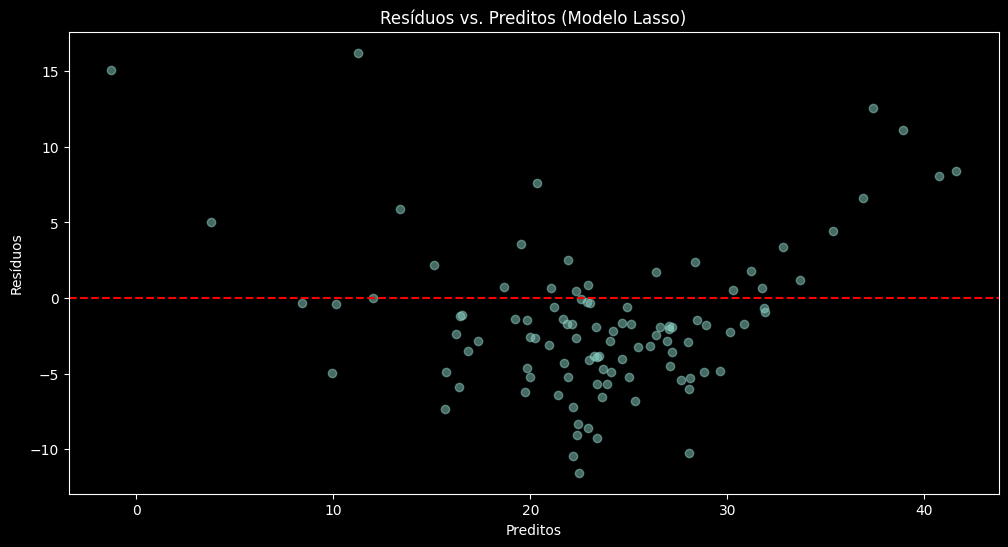

In [557]:
residuals_lasso = y1_test - y_pred_lasso

plt.figure(figsize=(12, 6))
plt.scatter(y_pred_lasso, residuals_lasso, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs. Preditos (Modelo Lasso)')
plt.xlabel('Preditos')
plt.ylabel('Resíduos')
plt.show()

### Histograma da distribuição dos resíduos

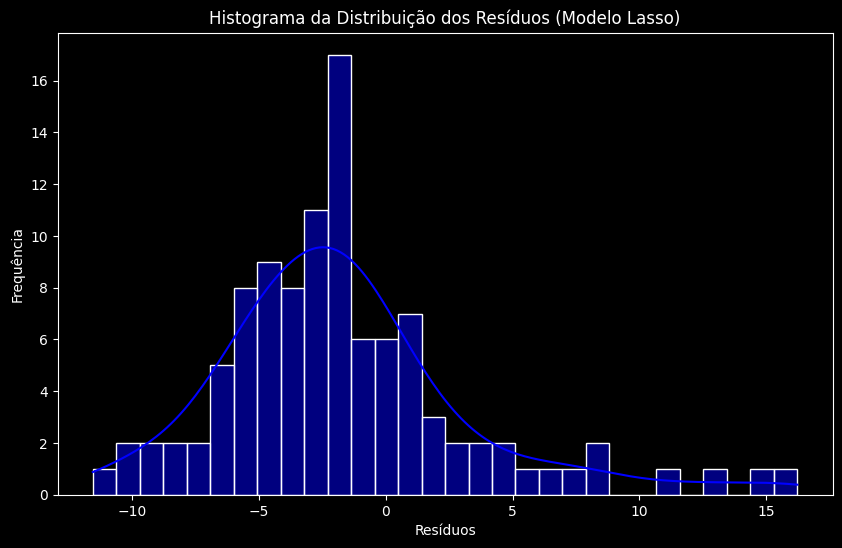

In [558]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals_lasso, bins=30, kde=True, color='b')
plt.title('Histograma da Distribuição dos Resíduos (Modelo Lasso)')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

### Mean Absolute Error

In [559]:
mae_lasso = mean_absolute_error(y1_test, y_pred_lasso)
print(f"MAE (Erro Absoluto Médio - Modelo Lasso): {mae_lasso:.2f}")

MAE (Erro Absoluto Médio - Modelo Lasso): 4.05


### Mean Square Error

In [560]:
mse_lasso = mean_squared_error(y1_test, y_pred_lasso)
print(f"MSE (Erro Quadrático Médio - Modelo Lasso): {mse_lasso:.2f}")

MSE (Erro Quadrático Médio - Modelo Lasso): 27.04


### Root Mean Square Error

In [561]:
rmse_lasso = np.sqrt(mse_lasso)
print(f"RMSE (Raiz do Erro Quadrático Médio - Modelo Lasso): {rmse_lasso:.2f}")

RMSE (Raiz do Erro Quadrático Médio - Modelo Lasso): 5.20


### Erro Médio Absoluto Percentual

In [562]:
mape_lasso = mean_absolute_percentage_error(y1_test, y_pred_lasso) * 100
print(f"MAPE (Erro Médio Absoluto Percentual - Modelo Lasso): {mape_lasso:.2f}%")

MAPE (Erro Médio Absoluto Percentual - Modelo Lasso): 22.74%


### R² (R-Squared)

In [563]:
r2_lasso = r2_score(y1_test, y_pred_lasso)
print(f"R² (Coeficiente de Determinação - Modelo Lasso): {r2_lasso:.2f}")

R² (Coeficiente de Determinação - Modelo Lasso): 0.64


# Considerações finais
A nossa análise final vai se basear no melhor valor do RMSE, que é o que será avaliado pelo benchmarking na submissão.

In [564]:
print(f"RMSE Linear com 1 Feature: {rmse:.2f}")
print(f"RMSE Linear com 5 Features: {rmse1:.2f}")
print(f"RMSE Polinomial Grau 2: {rmse_poly2:.2f}")
print(f"RMSE Polinomial Grau 3: {rmse_poly3:.2f}")
print(f"RMSE Polinomial Grau 5: {rmse_poly5:.2f}")
print(f"RMSE Linear Ridge: {rmse_ridge:.2f}")
print(f"RMSE Linear Lasso: {rmse_lasso:.2f}")

RMSE Linear com 1 Feature: 6.82
RMSE Linear com 5 Features: 5.12
RMSE Polinomial Grau 2: 4.99
RMSE Polinomial Grau 3: 28.48
RMSE Polinomial Grau 5: 4039.36
RMSE Linear Ridge: 5.11
RMSE Linear Lasso: 5.20


Como podemos ver, entre todos os modelos criados, treinados e avaliados, o melhor entre eles é a **RMSE Polinomial com Grau 2**. Porém, ele ainda pode ser melhorado, então vamos seguir para os próximos passos.

## Melhorias no modelo:
Primeiramente, vamos aumentar a quantidade de features que o modelo pode utilizar, afim de treiná-lo melhor para as predições.

Para isso, adicionaremos todas as variáveis restantes do dataset.

Também normalizamos os valores usando o RobustScaler.

In [565]:
X2 = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']]
y2 = df['medv']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.31, random_state=69)

In [566]:
X2_train = scaler.fit(X2_train).transform(X2_train)
X2_test = scaler.fit(X2_test).transform(X2_test)

Com isso, treinaremos o modelo com a nova base utilizando K-Fold para poder obter a melhor versão desse modelo.

In [ ]:
n_splits_values = range(2, 150)

best_rmse = float('inf')
best_n_splits = None
best_model = None

for n_splits in n_splits_values:
    kf = KFold(n_splits=n_splits)
    min_rmse = float('inf')
    model_with_min_rmse = None

    for train_index, test_index in kf.split(X2):
        X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
        y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]

        poly2 = PolynomialFeatures(degree=2)
        X2_train_poly2 = poly2.fit_transform(X2_train)
        X2_test_poly2 = poly2.transform(X2_test)

        poly2_model = LinearRegression()
        poly2_model.fit(X2_train_poly2, y2_train)
        poly2_predictions = poly2_model.predict(X2_test_poly2)

        rmse = np.sqrt(mean_squared_error(y2_test, poly2_predictions))

        if rmse < min_rmse:
            min_rmse = rmse
            model_with_min_rmse = poly2_model

    if min_rmse < best_rmse:
        best_rmse = min_rmse
        best_n_splits = n_splits
        best_model = model_with_min_rmse

print(f"Melhor modelo de regressão polinomial de grau 2:")
print(f"RMSE mínimo = {best_rmse:.2f}, n_splits = {best_n_splits}")

poly2_improved = best_model

Com essa melhor versão obtida e salva, vamos realizar as predições para a submissão e enviar.

# Submissão

In [ ]:
X2_test = df_test[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']]

X2_test_poly2 = poly2.transform(X2_test)
predictions = poly2_improved.predict(X2_test_poly2)

submission_df = pd.DataFrame({'ID': df_test['ID'], 'medv': predictions})
submission_df.to_csv('submission.csv', index=False)
submission_df.head()